# Random Graph

In [22]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from scipy.stats import poisson

Number of nodes: 20
Number of edges: 40
Average degree: 4.0
Variance of degree distribution: 3.2


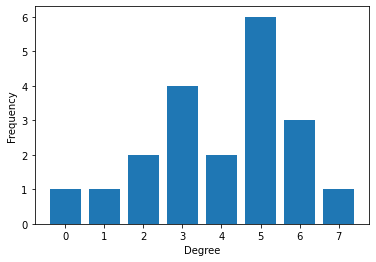

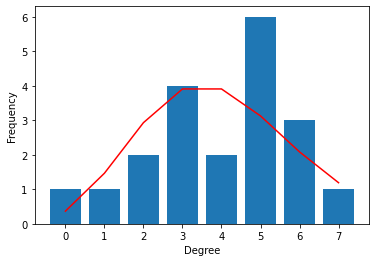

<Figure size 432x288 with 0 Axes>

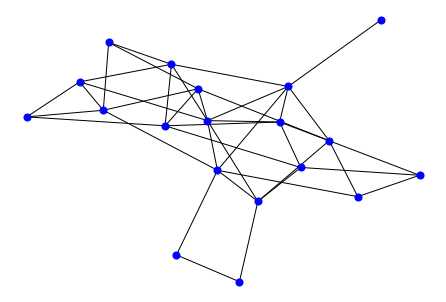

Number of nodes: 100
Number of edges: 200
Average degree: 4.0
Variance of degree distribution: 4.14


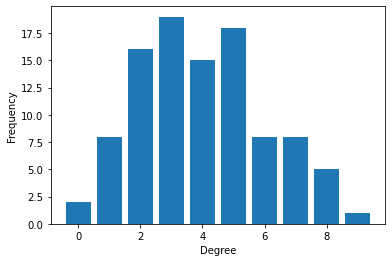

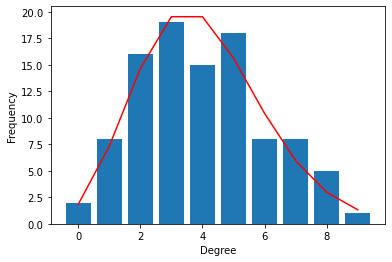

Number of nodes: 500
Number of edges: 1000
Average degree: 4.0
Variance of degree distribution: 4.092


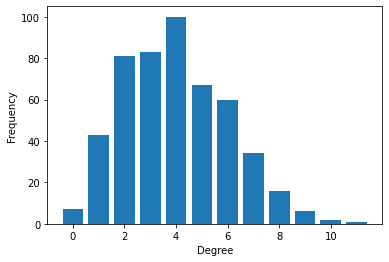

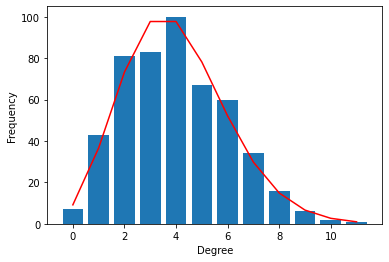

Number of nodes: 2000
Number of edges: 4000
Average degree: 4.0
Variance of degree distribution: 3.874


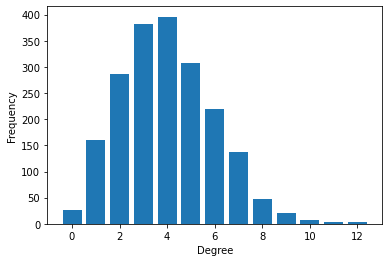

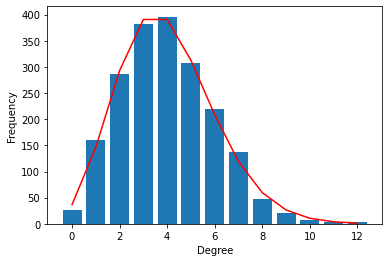

<Figure size 432x288 with 0 Axes>

In [24]:

def generate_random_graph(N, L):
    G = {}
    nodes = range(N)
    for i in nodes:
        G[i] = set()
    while L > 0:
        i, j = np.random.choice(nodes, size=2, replace=False)
        if j not in G[i]:
            G[i].add(j)
            G[j].add(i)
            L -= 1
    return G
N_range = [20, 100, 500, 2000]
L_range = [40, 200, 1000, 4000]

for N, L in zip(N_range, L_range):
    G = generate_random_graph(N, L)
    
    # report number of vertices and edges
    num_vertices = N
    num_edges = sum([len(G[i]) for i in range(N)]) // 2
    print("Number of nodes:", num_vertices)
    print("Number of edges:", num_edges)

    # compute average degree and variance of degree distribution
    degrees = [len(G[i]) for i in range(N)]
    avg_degree = np.mean(degrees)
    var_degree = np.var(degrees)
    print("Average degree:", avg_degree)
    print("Variance of degree distribution:", var_degree)

    # generate frequency plot for degrees of nodes
    degree_freq = np.zeros(max(degrees) + 1)
    for i in range(N):
        degree_freq[len(G[i])] += 1
    plt.bar(range(len(degree_freq)), degree_freq)
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.savefig(f"degree_freq_N_{N}_L_{L}.png")
    plt.show()
    plt.clf()

    # fit a model distribution to the data
    mu = avg_degree
    fit = poisson.pmf(range(max(degrees) + 1), mu) * N
    plt.bar(range(len(degree_freq)), degree_freq)
    plt.plot(fit, 'r')
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.savefig(f"degree_fit_N_{N}_L_{L}.png")
    plt.show()
    plt.clf()
    
    # visualize graph with at most 20 nodes
    if N <= 20:
        edges = []
        for i in G:
            for j in G[i]:
                if i < j:
                    edges.append((i, j))
        plt.figure()
        nx_G = nx.Graph(edges)
        pos = nx.spring_layout(nx_G)
        nx.draw(nx_G, pos, node_color='b', edge_color='k', node_size=50, with_labels=False)
        plt.savefig(f"graph_N_{N}_L_{L}.png")
        plt.show()
        plt.clf()

    # save graph values as a file
    nx.write_graphml(nx.Graph(G), f"graph_N_{N}_L_{L}.graphml")


N = 20 k = 4 p = 0
Number of nodes: 20
Number of edges: 56
Average degree: 5.6
Variance of degree distribution: 12.640000000000002


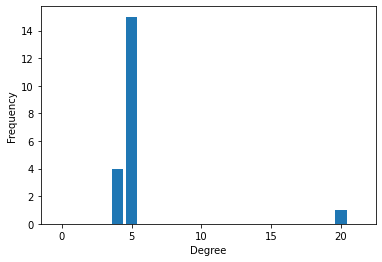

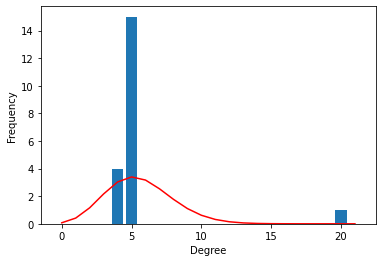

<Figure size 432x288 with 0 Axes>

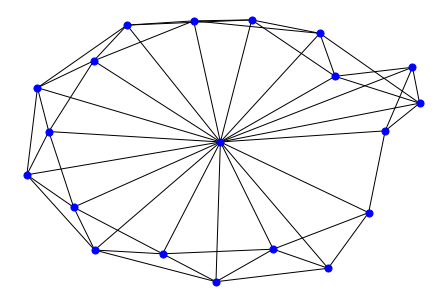

N = 20 k = 4 p = 0.1
Number of nodes: 20
Number of edges: 55
Average degree: 5.5
Variance of degree distribution: 13.05


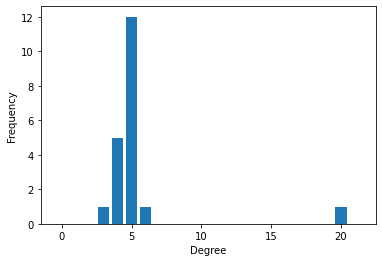

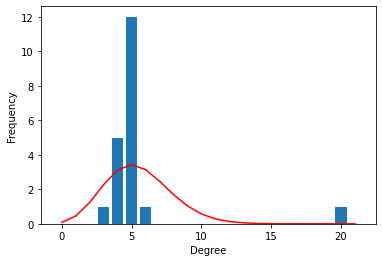

<Figure size 432x288 with 0 Axes>

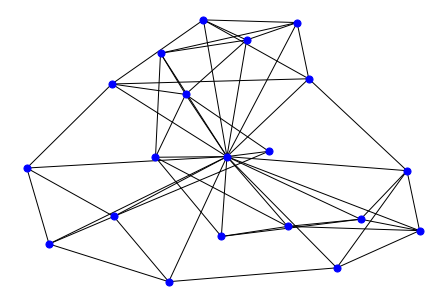

N = 20 k = 4 p = 0.5
Number of nodes: 20
Number of edges: 53
Average degree: 5.3
Variance of degree distribution: 14.609999999999996


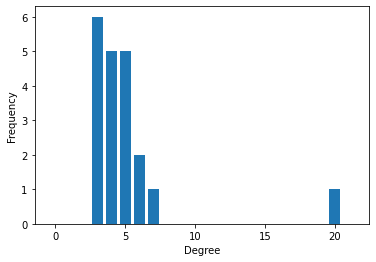

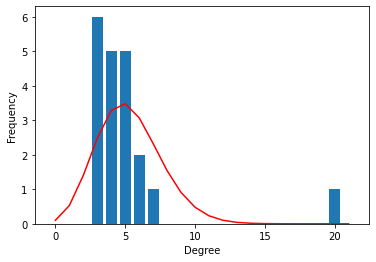

<Figure size 432x288 with 0 Axes>

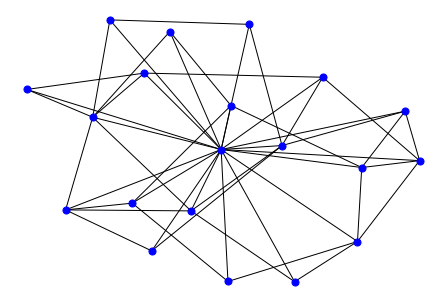

N = 20 k = 4 p = 0.9
Number of nodes: 20
Number of edges: 55
Average degree: 5.5
Variance of degree distribution: 14.45


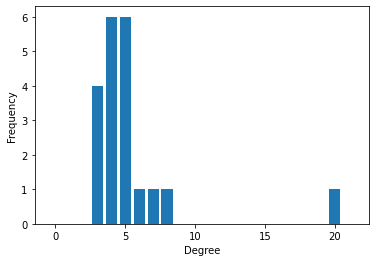

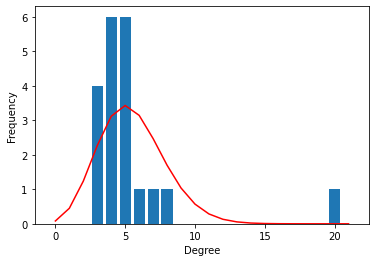

<Figure size 432x288 with 0 Axes>

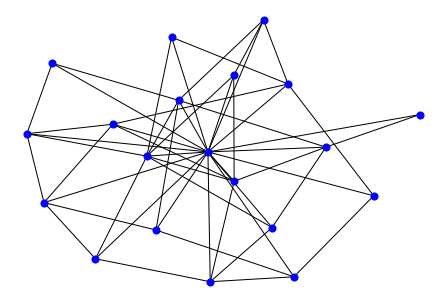

N = 20 k = 4 p = 1
Number of nodes: 20
Number of edges: 57
Average degree: 5.7
Variance of degree distribution: 13.810000000000002


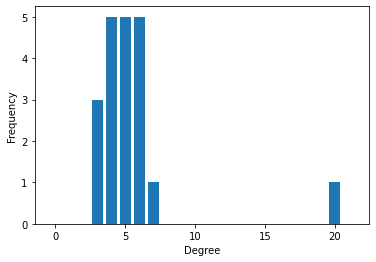

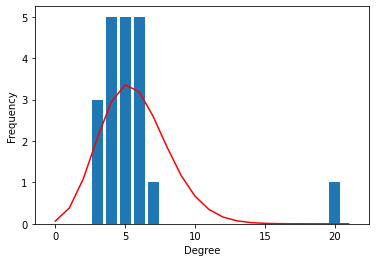

<Figure size 432x288 with 0 Axes>

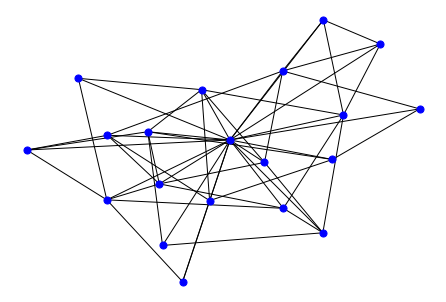

N = 100 k = 10 p = 0
Number of nodes: 100
Number of edges: 590
Average degree: 11.8
Variance of degree distribution: 80.46000000000004


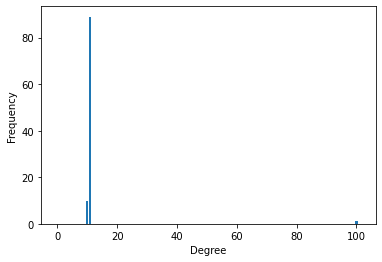

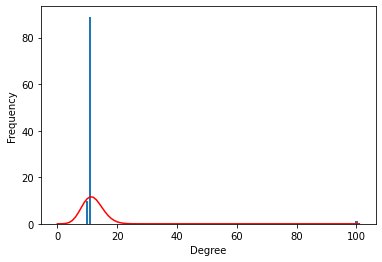

N = 100 k = 10 p = 0.1
Number of nodes: 100
Number of edges: 586
Average degree: 11.72
Variance of degree distribution: 81.42160000000004


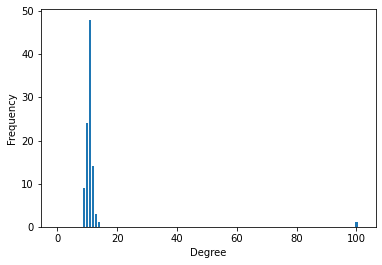

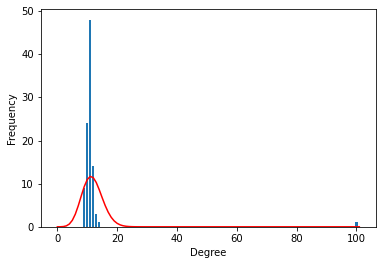

N = 100 k = 10 p = 0.5
Number of nodes: 100
Number of edges: 569
Average degree: 11.38
Variance of degree distribution: 84.27559999999998


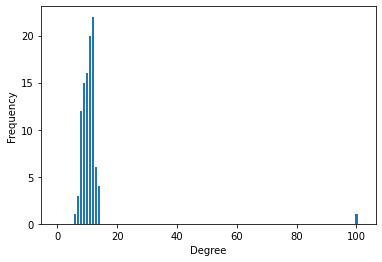

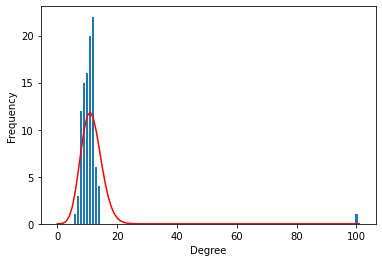

N = 100 k = 10 p = 0.9
Number of nodes: 100
Number of edges: 566
Average degree: 11.32
Variance of degree distribution: 85.5776


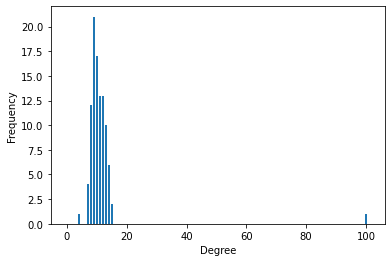

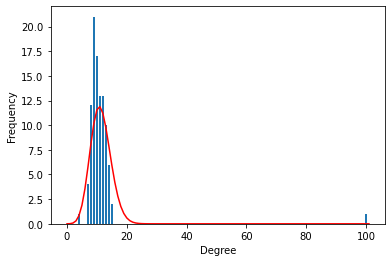

N = 100 k = 10 p = 1
Number of nodes: 100
Number of edges: 568
Average degree: 11.36
Variance of degree distribution: 85.8504


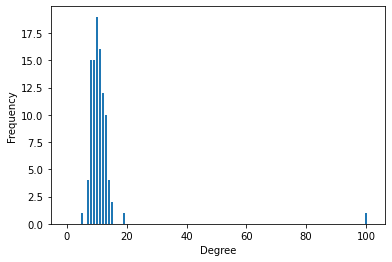

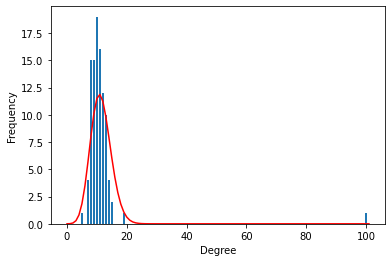

N = 500 k = 20 p = 0
Number of nodes: 500
Number of edges: 5480
Average degree: 21.92
Variance of degree distribution: 459.9936000000002


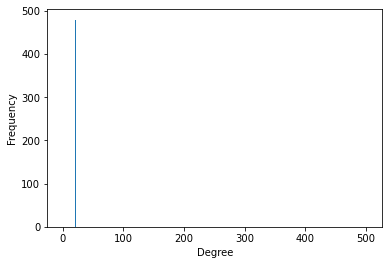

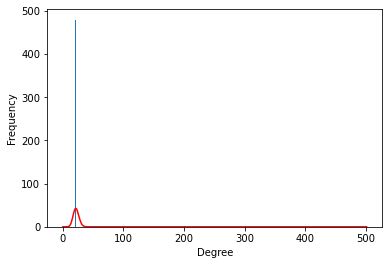

N = 500 k = 20 p = 0.1
Number of nodes: 500
Number of edges: 5457
Average degree: 21.828
Variance of degree distribution: 462.02241600000013


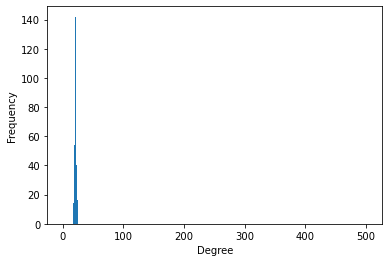

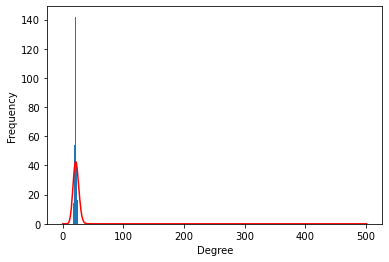

N = 500 k = 20 p = 0.5
Number of nodes: 500
Number of edges: 5412
Average degree: 21.648
Variance of degree distribution: 468.34409600000004


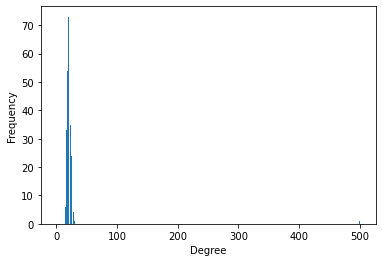

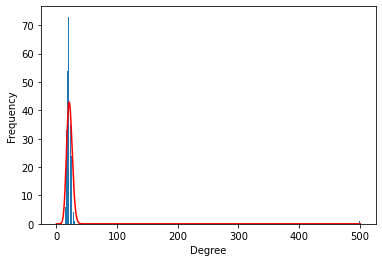

N = 500 k = 20 p = 0.9
Number of nodes: 500
Number of edges: 5372
Average degree: 21.488
Variance of degree distribution: 471.085856


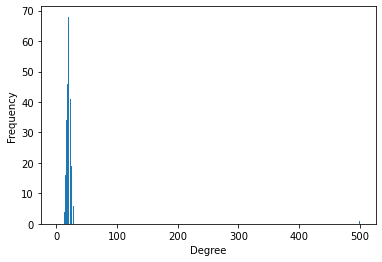

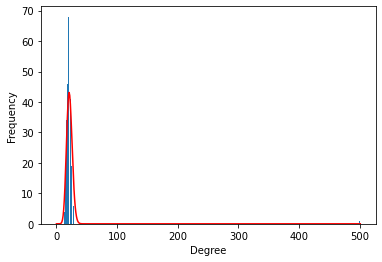

N = 500 k = 20 p = 1
Number of nodes: 500
Number of edges: 5401
Average degree: 21.604
Variance of degree distribution: 470.6551840000001


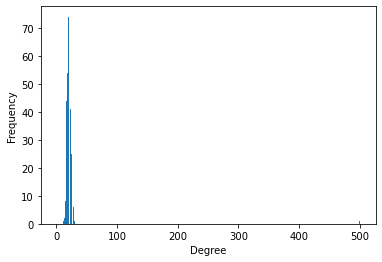

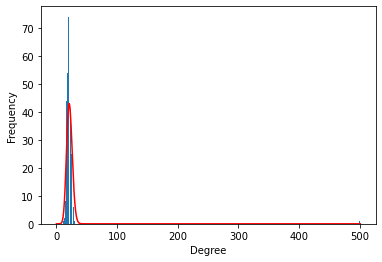

N = 2000 k = 50 p = 0
Number of nodes: 2000
Number of edges: 51950
Average degree: 51.95
Variance of degree distribution: 1900.3724999999995


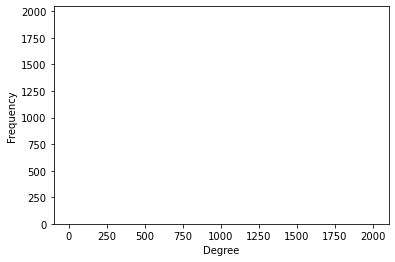

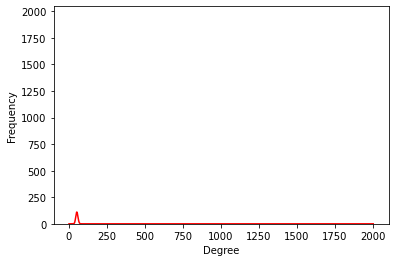

N = 2000 k = 50 p = 0.1
Number of nodes: 2000
Number of edges: 51833
Average degree: 51.833
Variance of degree distribution: 1905.0841110000001


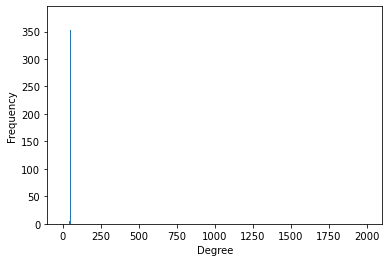

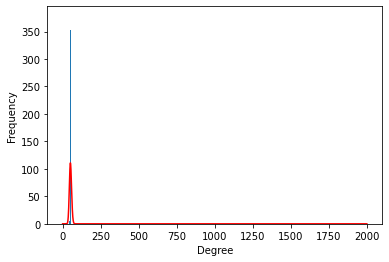

N = 2000 k = 50 p = 0.5
Number of nodes: 2000
Number of edges: 51521
Average degree: 51.521
Variance of degree distribution: 1918.787559


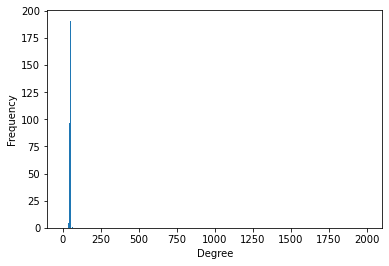

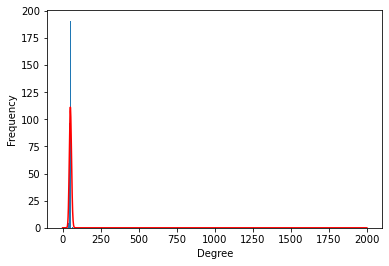

N = 2000 k = 50 p = 0.9
Number of nodes: 2000
Number of edges: 51343
Average degree: 51.343
Variance of degree distribution: 1926.6263509999999


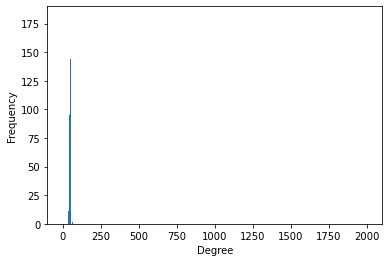

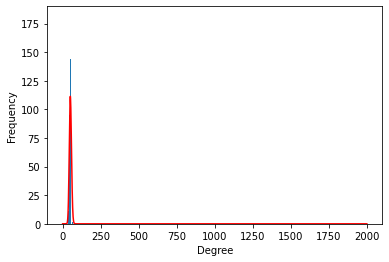

N = 2000 k = 50 p = 1
Number of nodes: 2000
Number of edges: 51341
Average degree: 51.341
Variance of degree distribution: 1924.7807189999999


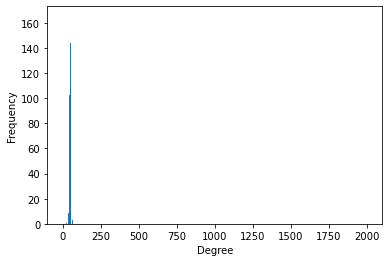

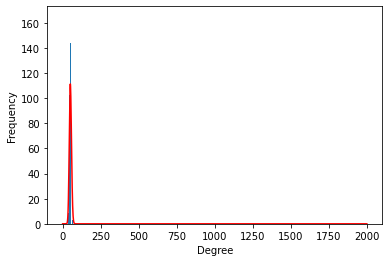

<Figure size 432x288 with 0 Axes>

In [53]:


def watts_strogatz_graph(N, k, p):
    # create a regular ring lattice with k neighbors
    neighbors = np.zeros((N, k), dtype=int)
    for i in range(N):
        neighbors[i,:k//2] = (i + 1 + np.arange(k//2)) % N    
    # rewire edges with probability p
    for i in range(N):
        for j in range(k//2):
            if np.random.rand() < p:
                new_j = np.random.randint(0, N-1)
                neighbors[i, j] = new_j
    
    # create graph from the neighbor matrix
    G = nx.Graph()
    for i in range(N):
        for j in neighbors[i]:
            G.add_edge(i, j)
    
    return G

N_range = [20, 100, 500, 2000]
k_range = [4, 10, 20, 50]
p_range = [0, 0.1, 0.5, 0.9, 1]

for N, k in zip(N_range, k_range):
    for p in p_range:
        G = watts_strogatz_graph(N, k, p)
        degrees = [val for (node, val) in G.degree()]
        avg_degree = np.mean(degrees)
        var_degree = np.var(degrees)
        print("N =", N, "k =", k, "p =", p)
        print("Number of nodes:", N)
        print("Number of edges:", G.number_of_edges())
        print("Average degree:", avg_degree)
        print("Variance of degree distribution:", var_degree)

        # generate frequency plot for degrees of nodes
        degree_freq = np.zeros(max(degrees) + 1)
        for i in range(N):
            degree_freq[len(G[i])] += 1
        plt.bar(range(len(degree_freq)), degree_freq)
        plt.xlabel("Degree")
        plt.ylabel("Frequency")
        plt.savefig(f"watts_strogatz_degree_freq_N_{N}_k_{k}_p_{p}.png")
        plt.show()
        plt.clf()

        # fit a model distribution to the data
        mu = avg_degree
        fit = poisson.pmf(range(max(degrees) + 1), mu) * N
        plt.bar(range(len(degree_freq)), degree_freq)
        plt.plot(fit, 'r')
        plt.xlabel("Degree")
        plt.ylabel("Frequency")
        plt.savefig(f"watts_strogatz_degree_fit_N_{N}_k_{k}_p_{p}.png")
        plt.show()
        plt.clf()

        # visualize graph with at most 20 nodes
        if N <= 20:
            plt.figure()
            pos = nx.spring_layout(G)
            nx.draw(G, pos, node_color='b', edge_color='k', node_size=50, with_labels=False)
            plt.savefig(f"watts_strogatz_graph_N_{N}_k_{k}_p_{p}.png")
            plt.show()
            plt.clf()

        # save graph values as a file
        nx.write_graphml(G, f"watts_strogatz_graph_N_{N}_k_{k}_p_{p}.graphml")


Number of nodes: 20
Number of edges: 37
Average degree: 3.7
Variance of degree distribution: 3.6099999999999994


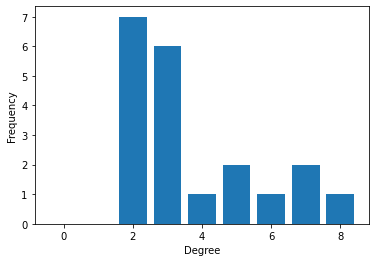

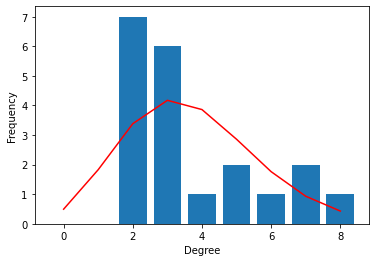

<Figure size 432x288 with 0 Axes>

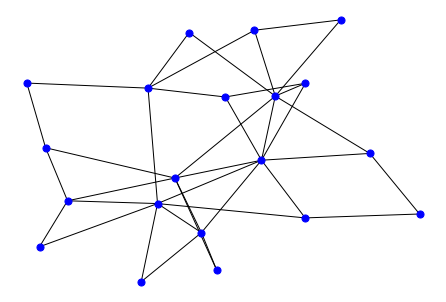

Number of nodes: 100
Number of edges: 485
Average degree: 9.7
Variance of degree distribution: 55.790000000000006


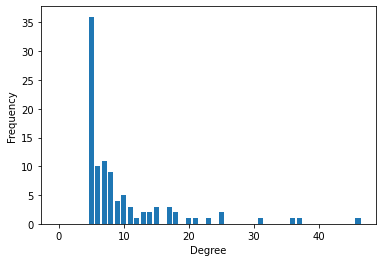

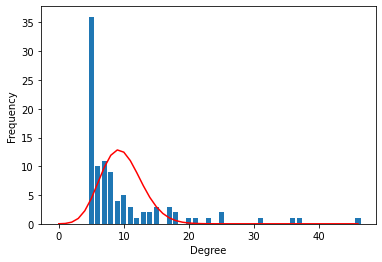

Number of nodes: 500
Number of edges: 4945
Average degree: 19.78
Variance of degree distribution: 258.6876


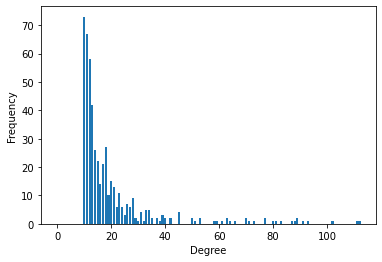

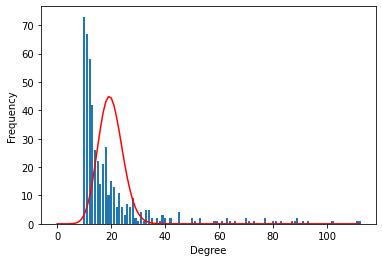

Number of nodes: 2000
Number of edges: 39790
Average degree: 39.79
Variance of degree distribution: 1245.8048999999999


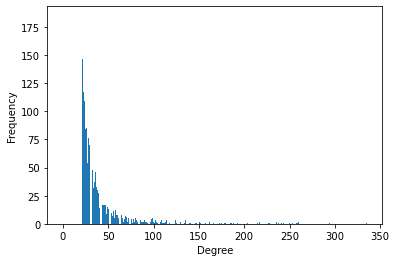

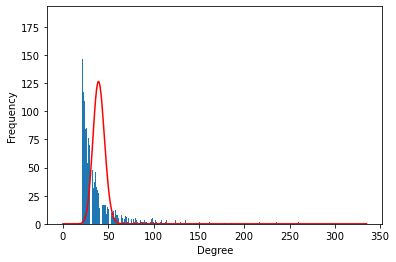

<Figure size 432x288 with 0 Axes>

In [7]:

def generate_barabasi_albert_graph(N, m):
    # initialize a complete graph with m+1 nodes
    G = {}
    nodes = range(m+1)
    for i in nodes:
        G[i] = set([j for j in nodes if j != i])

    # add remaining N-m-1 nodes, each with m edges
    for i in range(m+1, N):
        G[i] = set()
        # preferentially attach node to existing nodes with probability
        # proportional to their degree
        degrees = np.array([len(G[j]) for j in range(i)])
        while len(G[i]) < m:
            j = np.random.choice(i, p=degrees/sum(degrees))
            G[i].add(j)
            G[j].add(i)
            degrees[j] += 1

    return G

N_range = [20, 100, 500, 2000]
m_range = [2, 5, 10, 20]

for N, m in zip(N_range, m_range):
    G = generate_barabasi_albert_graph(N, m)
    
    # report number of vertices and edges
    num_vertices = N
    num_edges = sum([len(G[i]) for i in range(N)]) // 2
    print("Number of nodes:", num_vertices)
    print("Number of edges:", num_edges)

    # compute average degree and variance of degree distribution
    degrees = [len(G[i]) for i in range(N)]
    avg_degree = np.mean(degrees)
    var_degree = np.var(degrees)
    print("Average degree:", avg_degree)
    print("Variance of degree distribution:", var_degree)

    # generate frequency plot for degrees of nodes
    degree_freq = np.zeros(max(degrees) + 1)
    for i in range(N):
        degree_freq[len(G[i])] += 1
    plt.bar(range(len(degree_freq)), degree_freq)
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.savefig(f"degree_freq_N_{N}_m_{m}.png")
    plt.show()
    plt.clf()

    # fit a model distribution to the data
    mu = avg_degree
    fit = poisson.pmf(range(max(degrees) + 1), mu) * N
    plt.bar(range(len(degree_freq)), degree_freq)
    plt.plot(fit, 'r')
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.savefig(f"degree_fit_N_{N}_m_{m}.png")
    plt.show()
    plt.clf()
    
    # visualize graph with at most 20 nodes
    if N <= 20:
        edges = []
        for i in G:
            for j in G[i]:
                if i < j:
                    edges.append((i, j))
        plt.figure()
        nx_G = nx.Graph(edges)
        pos = nx.spring_layout(nx_G)
        nx.draw(nx_G, pos, node_color='b', edge_color='k', node_size=50, with_labels=False)
        plt.savefig(f"graph_N_{N}_m_{m}.png")
        plt.show()
        plt.clf()

    # save graph values as a file
    nx.write_graphml(nx.Graph(G), f"graph_N_{N}_m_{m}.graphml")


Number of nodes: 20
Number of edges: 37
Average degree: 3.7
Variance of degree distribution: 7.109999999999999


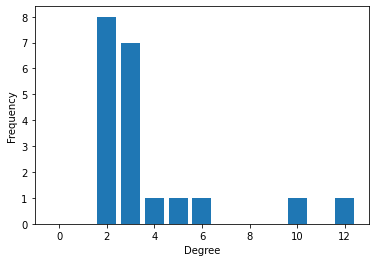

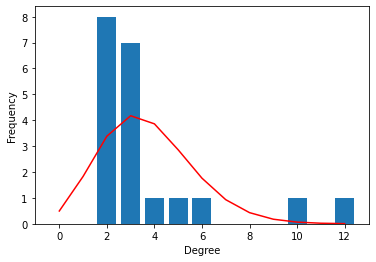

<Figure size 432x288 with 0 Axes>

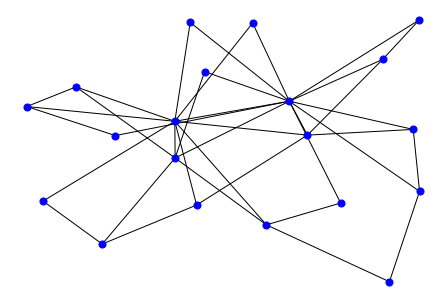

Number of nodes: 100
Number of edges: 485
Average degree: 9.7
Variance of degree distribution: 45.35


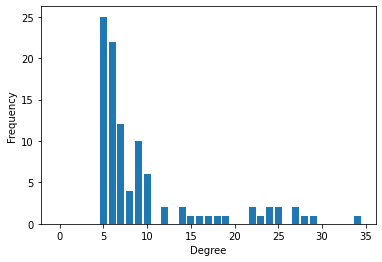

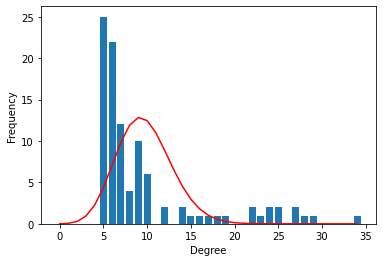

Number of nodes: 500
Number of edges: 4945
Average degree: 19.78
Variance of degree distribution: 265.48359999999997


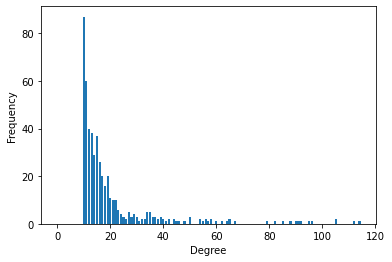

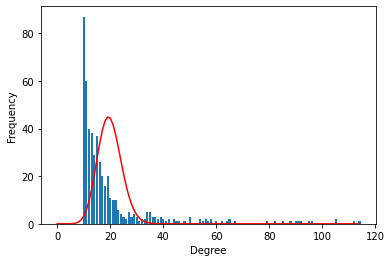

Number of nodes: 2000
Number of edges: 39790
Average degree: 39.79
Variance of degree distribution: 1265.6819000000003


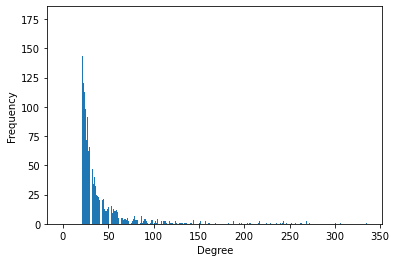

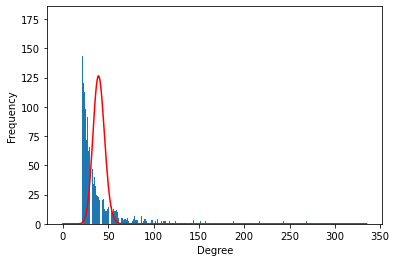

<Figure size 432x288 with 0 Axes>

In [6]:


# Barabasi-Albert Graph
def generate_ba_graph(N, m):
    G = {}
    nodes = list(range(m))
    for i in nodes:
        G[i] = set()
        for j in range(i):
            G[i].add(j)
            G[j].add(i)

    for i in range(m, N):
        G[i] = set()
        degrees = [len(G[j]) for j in range(i)]
        probs = degrees / np.sum(degrees)
        new_links = np.random.choice(range(i), size=m, replace=False, p=probs)
        for link in new_links:
            G[i].add(link)
            G[link].add(i)

    return G

#N = 2000
N_range = [20, 100, 500, 2000]
#L_range = [40, 200, 1000, 4000]

m_range = [2, 5, 10, 20]

for N, m in zip(N_range, m_range):
    G = generate_ba_graph(N, m)

    # report number of vertices and edges
    num_vertices = N
    num_edges = sum([len(G[i]) for i in range(N)]) // 2
    print("Number of nodes:", num_vertices)
    print("Number of edges:", num_edges)

    # compute average degree and variance of degree distribution
    degrees = [len(G[i]) for i in range(N)]
    avg_degree = np.mean(degrees)
    var_degree = np.var(degrees)
    print("Average degree:", avg_degree)
    print("Variance of degree distribution:", var_degree)

    # generate frequency plot for degrees of nodes
    degree_freq = np.zeros(max(degrees) + 1)
    for i in range(N):
        degree_freq[len(G[i])] += 1
    plt.bar(range(len(degree_freq)), degree_freq)
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.savefig(f"ba_degree_freq_m_{m}.png")
    plt.show()
    plt.clf()

    # fit a model distribution to the data
    mu = avg_degree
    fit = poisson.pmf(range(max(degrees) + 1), mu) * N
    plt.bar(range(len(degree_freq)), degree_freq)
    plt.plot(fit, 'r')
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.savefig(f"ba_degree_fit_m_{m}.png")
    plt.show()
    plt.clf()

    # visualize graph with at most 20 nodes
    if N <= 20:
        edges = []
        for i in G:
            for j in G[i]:
                if i < j:
                    edges.append((i, j))
        plt.figure()
        nx_G = nx.Graph(edges)
        pos = nx.spring_layout(nx_G)
        nx.draw(nx_G, pos, node_color='b', edge_color='k', node_size=50, with_labels=False)
        plt.savefig(f"BA_graph_N_{N}_m_{m}.png")
        plt.show()
        plt.clf()

    # save graph values as a file
    nx.write_graphml(nx.Graph(G), f"ba_graph_m_{m}.graphml")
